# Integrales Definidas y su aplicación al área de una región bajo una curva:

## Objetivo específico: 
* Comprender el concepto de integral definida y su realción con el área de una región bajo una curva


## Contenidos:
* La integral definida mediante sumas de Riemann y propiedades fundamentales relacionadas con el álgebra de funciones. 
* Cálculo de la integral definida. Teorema fundamental del cálculo. 
* Aplicación de la integral definida al cálculo de áreas bajo una curva y área entre curvas.


1. **La integral definida en una variable**

**Introducción**

El problema del área: encontremos el área de una región $R$ que está debajo de la curva $y=f(x)$, desde un punto inicial $a$ hasta un punto final $b$. Esto significa que $R$ está limitado por la gráfica de una función continua $f$ [donde $f(x)\geq 0$], las rectas verticales $x=a$ y $x=b$ y el eje $x$. Veamos la siguiente gráfica:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Define la función f(x) que quieres graficar
def f(x):
    return x**2 # Cambia esta función según tus necesidades

# Función para graficar y calcular el área bajo la curva
def plot_area_under_curve(a, b):
    x = np.linspace(0, 5, 400)
    y = f(x)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, 'r', linewidth=2)
    ax.fill_between(x, y, 0, where=(x >= a) & (x <= b), color='blue', alpha=0.3)
    ax.axvline(x=a, color='green', linestyle='--')
    ax.axvline(x=b, color='green', linestyle='--')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Área bajo la curva')

    plt.show()

# Crea deslizadores interactivos para 'a' y 'b'
interact(plot_area_under_curve, a=widgets.FloatSlider(min=0, max=5, step=0.1, value=0),
         b=widgets.FloatSlider(min=0, max=5, step=0.1, value=2))
# @hidden_cell


interactive(children=(FloatSlider(value=0.0, description='a', max=5.0), FloatSlider(value=2.0, description='b'…

<function __main__.plot_area_under_curve(a, b)>

Al intentar resolver el problema del área, debemos preguntarnos: ¿cuál es el significado de la palabra área? Esta cuestion es fácil de responder para regiones con lados rectos, como por ejemplo con las funciones lineales [$f(x)=mx+b$], funciones constantes [$f(x)=c, c \in \mathbb{R}$]; las cuales representan un triángulo donde su área se define como base por altura dividido entre dos $\left(\displaystyle{\frac{b\cdot h}{2}}\right)$ y un rectángulo cuya área se calcula realizando el producto del largo por el ancho $\left(l\cdot a \right)$ de la figura.

Sin embargo, ¿qué sucede con las figuras cuyos lados son curvos? No es tan sencillo como seguir una fórmula. Por este motivo, pensemos en una aproximación de la región $R$ por medio de una figura que conocemos su área, en este caso rectángulos, y después tomando el límite de las áreas de los rectángulos cuando se incrementa el número de éstos. 

En el siguiente ejemplo se ilustra el procedimiento.


**Ejemplo:** Utilice rectángulos para estimar el área bajo la parábola $y=x^2$, desde $0$ hasta $1$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from scipy.integrate import quad

# Define la función f(x) que quieres integrar
def f(x):
    return x**2  # Cambia esta función según tus necesidades

# Función para calcular la suma de Riemann y mostrar el resultado
def riemann_sum(a, b, n):
    x = np.linspace(a, b, n + 1)
    y = f(x)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, 'r', linewidth=2)

    dx = (b - a) / n
    riemann_sum = sum(y[:-1]) * dx
    ax.bar(x[:-1], y[:-1], width=dx, align='edge', alpha=0.3)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Aproximación del área bajo la curva')

    plt.show()

    # Calcula el resultado de la integral
    result, _ = quad(f, a, b)
    print(f'Resultado de la integral: {result:.4f}')

# Crea deslizadores interactivos para 'a', 'b', y el número de rectángulos
interact(riemann_sum, a=widgets.FloatSlider(min=0, max=5, step=0.1, value=0),
         b=widgets.FloatSlider(min=0, max=5, step=0.1, value=1),
         n=widgets.IntSlider(min=1, max=100, step=1, value=10))
# @hidden_cell


interactive(children=(FloatSlider(value=0.0, description='a', max=5.0), FloatSlider(value=1.0, description='b'…

<function __main__.riemann_sum(a, b, n)>

El objetivo consiste en calcular el área de esta región plana. Por esto, dividimos el intervalo $[a,b]$ en $n$ subintervalos, cada uno de longitud $$\Delta = \frac{b-a}{n}$$
es decir, todos de igual longitud, mediante los puntos que llamaremos $$x_0=a, x_1, x_2, \cdots, x_{n-1}, x_n=b$$
en orden creciente. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def plot_recta(n):
    # Definir los puntos 'a' y 'b'
    a = 0
    b = 20

    # Generar los puntos x0, x1, ..., xn
    x = np.linspace(a, b, n+1)

    # Crear la recta
    plt.figure(figsize=(10, 4))
    plt.plot(x, np.zeros_like(x), 'o')

    # Añadir etiquetas a los puntos
    for i, xi in enumerate(x):
        subindice = f'$_{{x_{{{i // 10}{i % 10}}}}}$' if i >= 10 else f'$_{{x_{i}}}$'
        plt.text(xi, 0, subindice, fontsize=12, ha='center', va='bottom')

    # Ajustar los límites del eje x
    plt.xlim(a-1, b+1)

    # Etiquetas de los ejes
    plt.xlabel('x')
    plt.ylabel('y')

    # Título del gráfico
    plt.title('Recta con puntos en orden creciente')

    # Mostrar la recta
    plt.show()

# Crear deslizador
particiones_slider = widgets.IntSlider(value=20, min=1, max=50, step=1, description='Particiones:')

# Interactividad
widgets.interactive(plot_recta, n=particiones_slider)


interactive(children=(IntSlider(value=20, description='Particiones:', max=50, min=1), Output()), _dom_classes=…

Ahora, consideremos un rectangulo particular que tiene por base uno de los segmentos pequeños de la subdivisión y altura la imagen del extremo inferior del intervalo que define la base.

El área de este rectángulo es el producto de la longitud de la base por la altura, es decir $f(x_{i-1})\cdot \Delta$ (donde $\Delta$ es la longitud de la base y $f(x_{i-1})$ mide la altura)

La unión $R_n$ de todos estos rectángulos esbozan la forma de la curva. Por esto, el área de $R_n$ será la suma de todas las áreas de los rectángulos descritos, es decir el área $A$ de $R_n$ viende dada por $$A= f(x_0)\cdot \Delta+f(x_1)\cdot \Delta+ \cdots +f(x_{n-1}\cdot \Delta).$$

Y llamaremos a las áreas de estos rectángulos como $f(x_i)\cdot \Delta=A_i$.

Quedando como $$A= A_0+A_1+ \cdots +A_{n-1}.$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def f(x):
    return x**2  # Cambia esta función según tu necesidad

def plot_integral_approximation(n):
    # Definir los puntos 'a' y 'b'
    a = 0
    b = 5

    # Generar los puntos x0, x1, ..., xn
    x = np.linspace(a, b, n+1)

    # Calcular la altura de cada rectángulo
    heights = f(x[:-1])

    # Calcular el área de cada rectángulo
    areas = heights * (b - a) / n

    # Calcular la aproximación de la integral
    integral_approximation = np.sum(areas)

    # Colores para los rectángulos
    colors = ['lightblue', 'orange', 'lightgreen', 'salmon']

    # Crear la gráfica
    plt.figure(figsize=(10, 6))

    # Dibujar la función
    x_vals = np.linspace(a, b, 100)
    plt.plot(x_vals, f(x_vals), 'b-', linewidth=2, label='$f(x)$')

    # Dibujar los rectángulos y las etiquetas de los índices
    for i in range(n):
        color = colors[i % len(colors)]
        plt.bar(x[i], heights[i], width=(b - a) / n, align='edge', alpha=0.7, color=color)
        if i < 9:
            plt.text(x[i] + (b - a) / (2 * n), -0.5, f'$x_{i}$', ha='center', va='bottom', fontsize=10)
        else:
            plt.text(x[i] + (b - a) / (2 * n) - 0.03, -0.5, f'$x_{{{i}}}$', ha='center', va='bottom', fontsize=10)

    # Configuración de la gráfica
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Aproximación de la integral por rectángulos')
    plt.legend()

    # Mostrar el valor de la aproximación de la integral
    plt.text(0.5*(a+b), max(f(x)), f'Aproximación de la integral: {integral_approximation:.2f}', ha='center', va='bottom', fontsize=12)

    # Mostrar la gráfica
    plt.grid(True)
    plt.show()

# Crear deslizador
particiones_slider = widgets.IntSlider(value=10, min=1, max=50, step=1, description='Particiones:')

# Interactividad
widgets.interactive(plot_integral_approximation, n=particiones_slider)


interactive(children=(IntSlider(value=10, description='Particiones:', max=50, min=1), Output()), _dom_classes=…

# Definición
    
Formalmente, podemos decir que la definición de la integral definida se basa en la idea de que, para ciertas funciones, cuando las normas de las particiones de $[a,b]$ tienden a cero, los valores correspondientes de las sumas de Riemann tienden a un valor límite $A$. Es decir que con esta idea de límite es que una suma de Riemann estará cerca del número $A$ siempre que la norma de la partición sea lo suficientemente pequeña. Entonces, se define una integral definida como:
    
   > **DEFINICIÓN** Sea $f(x)$ una función definida en un intervalo cerrado $[a,b]$. Decimos que un número $A$ es la **integral definida de $f$ en $[a,b]$** y que $A$ es el límite de las sumas de Riemann $\displaystyle{\sum_{k=1}^{n}f(c_k)\Delta x_k}$ si se satisface la siguiente condición:
    Dado cualquier número $\varepsilon>0$, existe un número correspondiente $\delta >0$ tal que para toda participación $P=\{x_0,x_1, \cdots, x_n\}$ de $[a,b]$ con $||P||<\delta$ y cualquier elección de $c_k$ en $[x_{k-1},x_k]$, tenemos $$\left|\sum_{k=1}^{n}f(c_k)\Delta x_k-A\right|<\varepsilon.$$
    
   La definición involucra procesos de límite, en el cual la norma de la partición tiende a cero.
    
   Se tienen muchas posibilidades para una partición $P$ con una norma que tiende a cero, y muchas posibles elecciones de puntos $c_k$ para cada partición. La integral definida existe cuando obtenemos siempre el mismo límite $A$, sin importar la elección que se haga. Cuando el límite existe, lo escribimos como la integral definida: $$A=\int_{a}^{b}f(x)dx=\lim_{||P||\rightarrow 0}\left(\sum_{k=1}^{n}f(x_k)\Delta x_k\right).$$
    
   No obstante, esta definición es un poco engorrosa para comprender, por lo que se va a decir que una integral definida se puede ver como el límite de la sumas de las áreas de los rectángulos inferiores definidos en las sumas de Riemann, así:
   
>Si $f$ está definida bajo el intervalo $[a,b]$ y existe el límite $$\lim_{n\rightarrow \infty} (A_0+A_2+A_3+\cdots+A_{n-1}).$$ Entonces $f$ es integrable en $[a,b]$ y el límite se denota por $$\lim_{n\rightarrow \infty} (A_0+A_2+A_3+\cdots+A_{n-1})=\int_{a}^{b}f(x)dx.$$ El límite se llama integral definida de $f$ de $a$ a $b$. El número $a$ es el límite inferior y el número $b$ es el límite superior de la integral definida.

Veamos la siguiente gráfica que nos ejemplifica esta definición:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from scipy.integrate import quad

# Define la función f(x) que quieres integrar
def f(x):
    return x**3  # Cambia esta función según tus necesidades

# Función para calcular la suma de Riemann y mostrar el resultado
def riemann_sum(a, b, n, metodo):
    x = np.linspace(a, b, n + 1)
    y = f(x)

    fig, ax = plt.subplots(figsize=(10, 6))

    # Calcula la suma de Riemann según el método seleccionado
    if metodo == 'Izquierda':
        riemann_sum = sum(y[:-1]) * (b - a) / n
        ax.bar(x[:-1], y[:-1], width=(b - a) / n, align='edge', alpha=0.7, color=['orange', 'lightblue', 'lightgreen', 'salmon'] * (n // 4 + 1))
    elif metodo == 'Derecha':
        riemann_sum = sum(y[1:]) * (b - a) / n
        ax.bar(x[1:], y[1:], width=-(b - a) / n, align='edge', alpha=0.7, color=['orange', 'lightblue', 'lightgreen', 'salmon'] * (n // 4 + 1))
    elif metodo == 'Centro':
        x_midpoints = (x[:-1] + x[1:]) / 2
        riemann_sum = sum(f(x_midpoints)) * (b - a) / n
        ax.bar(x_midpoints, f(x_midpoints), width=(b - a) / n, alpha=0.7, color=['orange', 'lightblue', 'lightgreen', 'salmon'] * (n // 4 + 1))

    ax.plot(x, y, 'r', linewidth=2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Suma de Riemann ({metodo})')

    # Calcula el resultado exacto de la integral
    integral_exacta, _ = quad(f, a, b)

    # Calcula el resultado aproximado de la integral
    integral_aproximada = riemann_sum

    # Muestra el resultado de la integral exacta y la aproximación en la esquina superior izquierda
    ax.text(a, max(y), f'Área bajo la curva: {integral_exacta:.0f}', ha='left', va='top', fontsize=12)
    ax.text(a, max(y) * 0.9, f'Aproximación del área: {integral_aproximada:.5f}', ha='left', va='top', fontsize=12)

    plt.show()

# Crea deslizadores interactivos para 'a', 'b', el número de rectángulos y el método de Riemann
interact(riemann_sum, a=widgets.IntSlider(min=0, max=10, step=1, value=0),
         b=widgets.IntSlider(min=0, max=10, step=1, value=2),
         n=widgets.IntSlider(min=1, max=100, step=1, value=10),
         metodo=widgets.Dropdown(options=['Izquierda', 'Derecha', 'Centro'], value='Izquierda'))


interactive(children=(IntSlider(value=0, description='a', max=10), IntSlider(value=2, description='b', max=10)…

<function __main__.riemann_sum(a, b, n, metodo)>

# Elementos que la componen
         
   Recordemos como se escribe una integral definida $f(x)$ en un intervalo $[a,b]$, $$\int_{a}^{b}f(x)dx.$$ 
   Esta se lee como "la **integral de $a$ a $b$ de $f$ de $x$, de $x$**", o algunas veces como "la integral de $a$ a $b$ de  $f$ de $x$ con respecto a $x$". 
  Se puede observar que la integral está compuesta por varias partes y estos reciben nombres especiales:
   1. $\int$, este es el símbolo de la integral, que hace referencia a una $S$ de suma.
   2. $a$ es el límite inferior de la integral.
   3. $b$ es el límite superior de la integral.
   4. La función $f(x)$ es el integrando.
   5. $dx$, x es la variable de integración.
    
   Es importante resaltar que las variables $a,b,f(x),x$ son simples representación que pueden ser remplazadas por cualquier otra variable, por ejemplo: $$\int_{a}^{b}f(x)dx=\int_{c}^{d}g(t)dt=\int_{m}^{n}p(s)ds.$$

 # Ejemplos
 
   1. $\displaystyle{\int_{0}^{1}x+2 dx}$
   2. $\displaystyle{\int_{-1}^{1}y^2 dy}$
   3. $\displaystyle{\int_{4}^{5}sen(t)+t dt}$

# Relación con las sumas de Riemann y el área bajo una curva

Anteriormente se aproximó el área debajo de la gráfica de una función continua no negativa usando sumas finitas de áreas de rectángulos que capturan la región. Todas ellas son casos de sumas de Riemann construidas de manera especial. Un teorema garantiza que todas estas suman de Riemann convergen a una integral definida única cuando la norma de las particiones se aproxima a cero y el número de subintervalos tiende a infinito. Como consecuencia, ahora se puede _definir_ el área debajo de la gráfica de una función integrable no negativa como el valor de esa integral definida.
      
   > **DEFINICIÓN** Si $y=f(x)$ es no negativa e integrable en un intervalo cerrado $[a,b]$, entonces, el **área debajo de la curva $y=f(x)$ en $[a,b]$** es la integral de $f$ de $a$ a $b$, $$A=\int_{a}^{b} f(x)dx.$$
  
  >**Teorema fundamental del cálculo**
  Siendo $f$ una función continua en el intervalo $[a,b]$ tal que $F(x)$ es una antiderivada o primitiva de $f$ en $[a,b]$,   entonces
 $$\int_{a}^{b}f(x)dx=F(b)-F(a).$$
 
Con esto, podemos calcular el valor exacto de la integral definida aplicando este resultado. Al hacerlo vamos a denotar la diferencia $F(b)-F(a)$ por $F(x)\Big|_a^b$, vamos a enteder por esta notación que una vez hemos encontrado una antiderivada de $f$, para el cálculo de la integral definida, se evalúa primero esta derivada en el extremo superior $(b)$ menos el valor correspondiente para el extremo inferior $(a)$.

Por lo tanto, se tiene que: 

> $$\int_{a}^bf(x)dx=F(x)\Big|_a^b=F(b)-F(a)$$
 
 **Ejemplos** 


a. Evaluar $\displaystyle{\int_{-1}^{2}(x^2-x+2)dx}$

**Solución:**
Vamos a realizar la solución por pasos:
   1. Determinemos quién es la función, en este caso es $f(x)=x^2-x+2$.
   2. Ahora, pensemos en una antiderivada, es decir qué derivamos para obtener $f$; en este caso una opción puede ser $\frac{x^3}{3}-\frac{x^2}{2}+2x$.
   3. Teniendo esto podemos aplicar el Teorema fundamental del Cálculo, así
 \begin{eqnarray*}
 \int_{-1}^{2}(x^2-x+2)dx&=&{\frac{x^3}{3}-\frac{x^2}{2}+2x}\Big|_{-1}^{2}\\
 &=& \left( \frac{2^3}{3}-\frac{2^2}{2}+2\cdot 2\right) - \left( \frac{(-1)^3}{3}-\frac{(-1)^2}{2}+2(-1)\right)\\
 &=& \frac{14}{3}-\frac{-17}{6}\\
 &=& \frac{45}{6}= \frac{15}{2}=7.5
 \end{eqnarray*}
 
b. Calcule $\displaystyle{\int_{0}^{b}xdx}$ y obtenga el área $A$ debajo de $y=x$ en el intervalo $[0,b]$, $b>0$.
      
**Solución:**
Observe que, 
\begin{eqnarray*}
\int_{0}^{b}xdx &=& \frac{x^2}{2}\Big|_0^b\\
&=& \frac{b^2}{2}-\frac{0^2}{2}\\
&=& \frac{b^2}{2}.
\end{eqnarray*}


# Propiedades fundamentales relacionadas con el álgebra de funciones

Propiedades de la integral definida. Si $f(x)$ y $g(x)$ son continuas en el intervalo de integración $a \leq x \leq b$:

  1. $\displaystyle{\int_{a}^{a} f(x) dx = 0}$.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Define la función f(x) que quieres graficar
def f(x):
    return x**2 # Cambia esta función según tus necesidades

# Función para graficar y calcular el área bajo la curva
def plot_area_under_curve(a, b):
    x = np.linspace(0, 5, 400)
    y = f(x)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, 'r', linewidth=2)
    ax.fill_between(x, y, 0, where=(x >= a) & (x <= b), color='blue', alpha=0.3)
    ax.axvline(x=a, color='green', linestyle='--')
    ax.axvline(x=b, color='green', linestyle='--')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Área bajo la curva')

    plt.show()
   
    
# Crea deslizadores interactivos para 'a' y 'b'
interact(plot_area_under_curve, a=widgets.FloatSlider(min=0, max=5, step=0.1, value=0),
         b=widgets.FloatSlider(min=0, max=5, step=0.1, value=2))

# @hidden_cell


interactive(children=(FloatSlider(value=0.0, description='a', max=5.0), FloatSlider(value=2.0, description='b'…

<function __main__.plot_area_under_curve(a, b)>

  2. $\displaystyle{\int_{a}^{b} f(x) dx = -\int_{b}^{a} f(x) dx}$.

3. $\displaystyle{\int_{a}^{b} c f(x) dx = c \int_{a}^{b} f(x) dx,}$ siendo $c$ una constante.

4. $\displaystyle{\int_{a}^{b} \{ f(x) \pm g(x) \} dx = \int_{a}^{b} f(x) dx \pm \int_{a}^{b} g(x) dx}$.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from scipy.integrate import quad

# Define las funciones f(x) y g(x)
def f(x):
    return x**2  # Cambia esta función según tus necesidades

def g(x):
    return 2*x  # Cambia esta función según tus necesidades

# Función para calcular y mostrar la propiedad
def integral_property(a, b, operation):
    # Calcula las integrales definidas de f(x) y g(x)
    integral_f, _ = quad(f, a, b)
    integral_g, _ = quad(g, a, b)
    
    if operation == '+':
        result_lhs, _ = quad(lambda x: f(x) + g(x), a, b)
        result_rhs = integral_f + integral_g
    elif operation == '-':
        result_lhs, _ = quad(lambda x: f(x) - g(x), a, b)
        result_rhs = integral_f - integral_g

    print(f'∫[{a}, {b}] (f(x) {operation} g(x)) dx = {result_lhs:.4f}')
    print(f'∫[{a}, {b}] f(x) dx {operation} ∫[{a}, {b}] g(x) dx = {result_rhs:.4f}')

    # Gráfica de las funciones y las áreas bajo las curvas
    x = np.linspace(a, b, 400)
    y1 = f(x)
    y2 = g(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label='f(x)')
    plt.plot(x, y2, label='g(x)')

    if operation == '+':
        plt.fill_between(x, y1+ y2, 0, color='blue', alpha=0.3, label='∫[a, b] (f(x) + g(x)) dx')
    elif operation == '-':
        plt.fill_between(x, y1 - y2, 0, color='blue', alpha=0.3, label='∫[a, b] (f(x) - g(x)) dx')

    plt.axvline(x=a, color='green', linestyle='--', label='a')
    plt.axvline(x=b, color='red', linestyle='--', label='b')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Propiedad de la Integral Definida')
    plt.show()

# Crea deslizadores interactivos para 'a', 'b', y el signo ±
interact(integral_property, a=widgets.FloatSlider(min=0, max=5, step=0.1, value=0),
         b=widgets.FloatSlider(min=0, max=5, step=0.1, value=2),
         operation=widgets.Dropdown(options=['+', '-'], value='+'))
# @hidden_cell


interactive(children=(FloatSlider(value=0.0, description='a', max=5.0), FloatSlider(value=2.0, description='b'…

<function __main__.integral_property(a, b, operation)>

5. $\displaystyle{\int_{a}^{c} f(x) dx + \int_{c}^{b} f(x) dx = \int_{a}^{b} f(x) dx}$, cuando $a<c<b$.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from scipy.integrate import quad

# Define la función f(x)
def f(x):
    return x**2  # Cambia esta función según tus necesidades

# Función para calcular la integral definida desde 'a' hasta 'b' y separarla en dos partes
def separate_integral(a, b, c):
    # Calcula la integral definida desde 'a' hasta 'b'
    integral_ab, _ = quad(f, a, b)
    
    # Calcula la integral definida desde 'a' hasta 'c'
    integral_ac, _ = quad(f, a, c)
    
    # Calcula la integral definida desde 'c' hasta 'b'
    integral_cb, _ = quad(f, c, b)
    
    # Muestra las dos partes de la integral
    print(f'Integral definida desde a hasta c: {integral_ac:.4f}')
    print(f'Integral definida desde c hasta b: {integral_cb:.4f}')
    print(f'Suma de las dos partes: {integral_ac + integral_cb:.4f}')
    
    # Gráfica de la función y las divisiones de área
    x = np.linspace(a, b, 400)
    y = f(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'r', linewidth=2)
    
    plt.fill_between(x, y, 0, where=(x >= a) & (x <= c), color='blue', alpha=0.3, label='Integral a-c')
    plt.fill_between(x, y, 0, where=(x >= c) & (x <= b), color='green', alpha=0.3, label='Integral c-b')
    
    plt.axvline(x=a, color='orange', linestyle='--', label='a')
    plt.axvline(x=c, color='purple', linestyle='--', label='c')
    plt.axvline(x=b, color='brown', linestyle='--', label='b')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Separación de la Integral')
    plt.show()

# Crea deslizadores interactivos para 'a', 'b', y 'c'
interact(separate_integral, a=widgets.FloatSlider(min=0, max=5, step=0.1, value=0),
         b=widgets.FloatSlider(min=0, max=5, step=0.1, value=2),
         c=widgets.FloatSlider(min=0, max=5, step=0.1, value=1))
# @hidden_cell


interactive(children=(FloatSlider(value=0.0, description='a', max=5.0), FloatSlider(value=2.0, description='b'…

<function __main__.separate_integral(a, b, c)>

6. Primer teorema del valor medio: $\displaystyle{\int_{a}^{b} f(x) dx= (b-a)f(x_0)}$ para al menos un valor $x=x_0$ entre $a$ y $b$.

7. Si $\displaystyle{F(u)=\int_{a}^{u} f(x) dx,}$ se verifica que $\frac{d}{du}F(u)=f(u)$

# Cálculo de integrales definidas


In [10]:
import sympy as sp
from sympy.abc import x
from ipywidgets import interact, widgets
import random
from IPython.display import display, Math
from IPython.display import display, HTML

def generar_ejercicio(funcion):
    # Definir los límites de integración aleatorios
    a = sp.Rational(sp.randprime(1, 10), sp.randprime(1, 10))
    b = sp.Rational(sp.randprime(1, 10), sp.randprime(1, 10))
    
    # Asegurar que 'a' sea menor que 'b'
    if a > b:
        a, b = b, a
    
    # Calcular la integral definida
    integral = sp.integrate(funcion, (x, a, b))
     
    # Crear la pregunta  
    pregunta = f'Calcule \; la \; siguiente \; integral \; definida:\; \\int_{{{a}}}^{{{b}}} {sp.latex(funcion)} \\, dx.'
    
    # Crear la solución
    solucion = f'La \; solución \; de \; la \; integral \; definida \\int_{{{a}}}^{{{b}}} {sp.latex(funcion)} \\, dx \;\; es \;\;  {sp.latex(integral)}.'
    
    return pregunta, solucion

def generar_ejercicio_parametrizado():
    # Seleccionar una función aleatoria
    funcion = random.choice(list(opciones_funcion.values()))
    
    # Generar el ejercicio
    ejercicio, solucion = generar_ejercicio(funcion)
    
    # Mostrar el ejercicio y la solución con Math de IPython.display
    display(Math(ejercicio))
    display(Math(solucion))

# Función para generar un nuevo ejercicio
def generar_nuevo_ejercicio(b):
    # Limpiar la salida y generar un nuevo ejercicio
    #from IPython.display import clear_output
    #clear_output(wait=True)  # Limpiar la salida
    generar_ejercicio_parametrizado()

# Función para limpiar los ejercicios anteriores
def limpiar_ejercicios(btn):
    # Limpiar la salida de la celda actual
    from IPython.display import clear_output
    clear_output(wait=True)
    # Volver a mostrar el botón de generar
    display(widgets.HBox([boton_reinicio, boton_limpiar]))

# Crear opciones para la función
opciones_funcion = {
    'sin(x)': sp.sin(x),
    'cos(x)': sp.cos(x),
    'x^2': x**2,
    '2cos(x)':2*sp.cos(x),
    'x^2+x-3':x**2+x-3,
    'x^3': x**3,
    'e^x': sp.exp(x),  
    'ln(x)': sp.ln(x),  
    'arcsin(x)': sp.asin(x),   
    '|x|': sp.Abs(x),
    'sqrt(x)': sp.sqrt(x), 
    'cbrt(x)': sp.cbrt(x), 
    'sqrt(x^2 + 1)': sp.sqrt(x**2 + 1),
    'x^4 - 3x^3 + 2x - 5': x**4 - 3*x**3 + 2*x - 5
}

# Botón para generar un nuevo ejercicio
boton_reinicio = widgets.Button(description="Generar Ejercicio")
boton_reinicio.on_click(generar_nuevo_ejercicio)

# Botón para limpiar los ejercicios anteriores
boton_limpiar = widgets.Button(description="Limpiar")
boton_limpiar.on_click(limpiar_ejercicios)

# Mostrar los botones de generación y limpieza de ejercicios
display(widgets.HBox([boton_reinicio, boton_limpiar]))

# Generar y mostrar un ejercicio parametrizado
generar_ejercicio_parametrizado()

# @hidden_cell


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
from ipycanvas import Canvas, hold_canvas
import ipywidgets as widgets

class Whiteboard:
    def __init__(self):
        self.canvas = Canvas(width=1000, height=1000)
        self.canvas.on_mouse_move(self.on_mouse_move)
        self.canvas.on_mouse_down(self.on_mouse_down)
        self.canvas.on_mouse_up(self.on_mouse_up)
        
        self.drawing = False
        self.last_pos = None
        self.draw_color = 'black'
        
        self.btn_clear = widgets.Button(description="Limpiar Pizarra")
        self.btn_clear.on_click(self.clear_canvas)
        
        display(widgets.HBox([self.canvas, self.btn_clear]))

    def on_mouse_down(self, x, y):
        self.drawing = True
        self.last_pos = (x, y)

    def on_mouse_move(self, x, y):
        if self.drawing:
            with hold_canvas(self.canvas):
                self.canvas.fill_style = self.draw_color
                self.canvas.stroke_style = self.draw_color
                self.canvas.line_width = 2
                self.canvas.begin_path()
                self.canvas.move_to(*self.last_pos)
                self.canvas.line_to(x, y)
                self.canvas.stroke()
                self.last_pos = (x, y)

    def on_mouse_up(self, x, y):
        self.drawing = False

    def clear_canvas(self, btn):
        self.canvas.clear()

wb = Whiteboard()
# @hidden_cell


# Aplicación de la integral definida al cálculo de áreas bajo una curva

### Disfrutando de la Montaña Rusa

Imagina que estás diseñando una montaña rusa, y la altura de un punto en la pista está dada por la función $h(t)=30-t^2$, donde $t$ está en segundos. Calcula el área debajo de la curva de altura en el intervalo de $t=0$ a $t=5$ segundos. ¿Qué representa este área en términos de la montaña rusa?

¿Qué interpretación física tiene la integral definida ?

#### Solución:

La altura de la montaña rusa está dada por $h(t)=30-t^2$. Para calcular el área debajo de la curva en el intervalo de $t=0$ a $t=5$, realizamos la integral definida:

\begin{eqnarray*} 
\int_{0}^{5} 30- t^2 dt &=& {30t-\frac{t^3}{3}}\Big|_{0}^{5}\\
&=& \left(150-\frac{125}{3}\right)-(0-0)\\
&=& \frac{325}{3}
\end{eqnarray*}

La integral definida en este contexto representa el trabajo total realizado por la fuerza de la gravedad al mover el carrito de la montaña rusa desde el inicio hasta el final del intervalo de tiempo.



In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from ipywidgets import interact, FloatSlider

# Definir la función de altura
def altura(t):
    return 30 - t**2

# Función para calcular el área bajo la curva hasta el tiempo dado
def calcular_area(tiempo):
    area, _ = quad(altura, 0, tiempo)
    return area

# Función para dibujar la gráfica interactiva
def dibujar_grafica(tiempo):
    # Definir el intervalo de tiempo
    t_intervalo = np.linspace(0, 5, 1000)

    # Calcular la altura en cada punto del intervalo
    alturas = altura(t_intervalo)

    # Crear la gráfica
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(t_intervalo, alturas, label='Altura (h(t))')

    # Dibujar el área bajo la curva hasta el tiempo actual
    ax.fill_between(t_intervalo, alturas, color='skyblue', alpha=0.4, label='Área bajo la curva')

    # Etiquetas y título
    ax.set_xlabel('Tiempo (t)')
    ax.set_ylabel('Altura')
    ax.set_title('Montaña Rusa - Área bajo la Curva')
    ax.legend()

    # Mostrar el área bajo la curva
    area_actual = calcular_area(tiempo)
    ax.text(2, 20, f'Área = {area_actual:.2f}', fontsize=12)

    # Dibujar el "carrito" como una imagen sin encojer
    carrito_imagen = plt.imread('E:\KHJ\TFG\Material Integrales\carrito.jpg')
    carrito_x = tiempo
    carrito_y = altura(tiempo)
    carrito_ancho = 0.4
    carrito_alto = 2
    ax.imshow(carrito_imagen, extent=[carrito_x - carrito_ancho/2, carrito_x + carrito_ancho/2, carrito_y - carrito_alto/2, carrito_y + carrito_alto/2], aspect='auto')

    # Actualizar el área bajo la curva dinámicamente
    ax.fill_between(t_intervalo, alturas, color='skyblue', alpha=0.4)
    ax.fill_between(t_intervalo[:int(tiempo * 200)], alturas[:int(tiempo * 200)], color='blue', alpha=0.4)

    # Mostrar la gráfica
    plt.show()

# Crear control deslizante interactivo
interact(dibujar_grafica, tiempo=FloatSlider(min=0, max=5, step=0.1, value=0))
# @hidden_cell


interactive(children=(FloatSlider(value=0.0, description='tiempo', max=5.0), Output()), _dom_classes=('widget-…

<function __main__.dibujar_grafica(tiempo)>

### Excursión a la Playa

Un grupo de estudiantes decide medir la temperatura del agua de mar durante una excursión a la playa. La temperatura $T(x)$ en grados Celsius en función de la distancia $x$ desde la orilla está dada por $T(x)=25+2\sin(0.1x)$. Calcule el área bajo la curva de temperatura en el intervalo de $x=0$ a $x=20$ metros. 

¿Cómo afectaría el cambio en la amplitud de la función sinusoidal a la interpretación del área bajo la curva?


#### Solución:

Para calcular el área bajo la curva de temperatura en el intervalo dado, podemos usar la fórmula de la integral definida:​$$A=\int_{0}^{20}T(x)dx.$$
Dada la función de temperatura $T(x)=25+2\sin(0.1x)$, podemos calcular la integral definida en el intervalo dado $[0,20]$.

\begin{eqnarray*}
\int_{0}^{20} 25+2\sin(0.1x) dx &=& \int_{0}^{20}25dx+\int_{0}^{20}2\sin\left(\frac{x}{10}\right)dx\\
&=& 25x\Big|_{0}^{20}+20\int_{0}^{2}\sin(u)du, \;\;\; \text{tomando,}\; u=\frac{x}{10}\\
&=& 500+\left[20(-\cos(u))\Big|_{0}^{2}\right]\\
&=& 500-20(\cos(2)-\cos(0))\\
&=& 500-20\cos(2)+20\\
&\approx& 528.323
\end{eqnarray*}

El cambio en la amplitud de la función sinusoidal afectaría la magnitud de las fluctuaciones de temperatura en relación con la temperatura base (25°C en este caso). Un aumento en la amplitud resultaría en fluctuaciones de temperatura más extremas, lo que aumentaría el área bajo la curva. Por el contrario, una disminución en la amplitud reduciría las fluctuaciones de temperatura y, por lo tanto, disminuiría el área bajo la curva. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Función para graficar la temperatura y el área bajo la curva
def plot_temperatura_y_area(amplitud):
    # Definir la función de temperatura
    def temperatura(x):
        return 25 + amplitud * np.sin(0.1 * x)

    # Generar puntos para graficar la función de temperatura
    x = np.linspace(0, 20, 100)
    y_temperatura = temperatura(x)

    # Calcular el área bajo la curva
    area = np.trapz(y_temperatura, x)

    # Determinar el color de la gráfica
    color = 'red' if amplitud > 2 else 'green'

    # Graficar la función de temperatura
    plt.figure(figsize=(12, 6))
    plt.plot(x, y_temperatura, label='Temperatura del agua', color=color)
    plt.fill_between(x, y_temperatura, color=color, alpha=0.3)
    plt.xlabel('Distancia desde la orilla (metros)')
    plt.ylabel('Temperatura (°C)')
    plt.title('Temperatura del agua en función de la distancia desde la orilla\nAmplitud: {} | Área bajo la curva: {:.2f}'.format(amplitud, area))
    plt.grid(True)
    plt.legend()

    # Mostrar el valor del área en la gráfica
    plt.text(10, 20, 'Área bajo la curva: {:.2f}'.format(area), fontsize=12, ha='center', va='center', backgroundcolor='lightgrey')
    
    plt.show()

# Crear slider interactivo para ajustar la amplitud
amplitud_slider = FloatSlider(value=2, min=0, max=5, step=0.1, description='Amplitud')

# Mostrar la gráfica interactiva
interact(plot_temperatura_y_area, amplitud=amplitud_slider)
# @hidden_cell


interactive(children=(FloatSlider(value=2.0, description='Amplitud', max=5.0), Output()), _dom_classes=('widge…

<function __main__.plot_temperatura_y_area(amplitud)>

### Flores en un Jardín

Supongamos que la densidad de flores en un jardín rectangular está modelada por la función $D(x)=50-0.5x$ flores por metro cuadrado, donde $x$ representa la distancia desde un extremo del jardín en metros. Calcula el número total de flores en el jardín de $x=0$ a $x=100$ metros.

¿Cómo cambiaría la respuesta si el jardín fuera trinagular en lugar de rectangular?

#### Solución:

Primero vamos a calcular el área del jardín rectangular, se necesita encontrar el área del jardín y luego calcular la integral definida de la función de densidad de flores por área.

Entonces, supongamos que el jardín tiene una longitud de $100$m y un ancho de $1$m, con el fin de simplificar los cálculos, el área sería de $100\cdot1=100$m.

Ahora, para calcular el número total de flores en el jardín rectangular, se puede utilizar la integral definida, ya que se conoce la función de densidad de las flores, $D(x)=50-0.5x$, y el intervalo de integración $[0,100]$. Así,

\begin{eqnarray*}
\int_{0}^{100}50-0.5xdx &=& 50x-\frac{1}{2\cdot2}x^2\Big|_{0}^{100}\\
&=& 50\cdot100-\frac{1}{4}\cdot{100}^2\\
&=& 2500
\end{eqnarray*}

Para el caso del jardín triangular, necesitaríamos conocer la forma exacta del triángulo para calcular su área y, a partir de ahí, realizar el cálculo del número total de flores. Dependiendo de la forma y el tamaño del triángulo, la respuesta podría cambiar. Si el triángulo tuviera una base de 100 metros y una altura de 1 metro (igual que el jardín rectangular), entonces el cálculo sería similar, considerando al base del triángulo rectángulo los límites de integración serían $[0,50]$, ya que el área del triagulo vendría dada por: $\displaystyle{\frac{b\cdot h}{2}=\frac{100\cdot1}{2}=50}$.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Función para calcular el número total de flores en un jardín rectangular
def calcular_numero_total_de_flores_rectangular():
    x = np.linspace(0, 100, 100)
    D = 50 - 0.5 * x
    area_rectangular = 100  # longitud * ancho
    numero_total_rectangular = np.trapz(D, x) 
    return numero_total_rectangular

# Función para calcular el número total de flores en un jardín triangular
def calcular_numero_total_de_flores_triangular(longitud_base):
    x = np.linspace(0, longitud_base, 100)
    D = 50 - 0.5 * x
    area_triangular = (longitud_base * 1) / 2  # (base * altura) / 2
    numero_total_triangular = np.trapz(D, x) 
    return numero_total_triangular

# Función para graficar el número total de flores y el área bajo la curva en jardines rectangular y triangular
def graficar_numero_total_de_flores_y_area(longitud_base_triangular):
    # Valores para el jardín rectangular
    x_rectangular = np.linspace(0, 100, 100)
    D_rectangular = 50 - 0.5 * x_rectangular
    
    # Valores para el jardín triangular
    x_triangular = np.linspace(0, longitud_base_triangular, 100)
    D_triangular = 50 - 0.5 * x_triangular
    
    # Calcular el área bajo la curva para cada tipo de jardín
    area_rectangular = calcular_numero_total_de_flores_rectangular()
    area_triangular = calcular_numero_total_de_flores_triangular(longitud_base_triangular)
    
    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Graficar la curva de densidad de flores para el jardín rectangular
    ax.plot(x_rectangular, D_rectangular, 'b-', label='Rectangular')
    
    # Graficar la curva de densidad de flores para el jardín triangular
    ax.plot(x_triangular, D_triangular, 'r-', label='Triangular')
    
    # Rellenar el área bajo la curva para el jardín rectangular
    ax.fill_between(x_rectangular, D_rectangular, color='lightblue', alpha=0.3)
    
    # Rellenar el área bajo la curva para el jardín triangular
    ax.fill_between(x_triangular, D_triangular, color='salmon', alpha=0.3)
    
    # Configuración de los ejes y la leyenda
    ax.set_xlabel('Distancia desde un extremo del jardín (m)')
    ax.set_ylabel('Densidad de flores (flores por metro cuadrado)')
    ax.set_title('Comparación de densidad de flores y área bajo la curva en jardines rectangular y triangular')
    ax.legend()
    plt.grid(True)
    
    # Mostrar el área bajo la curva en la parte superior de la gráfica
    ax.text(90, 15, f'Área Rectangular: {area_rectangular:.5f} m²', fontsize=10, ha='center')
    ax.text(longitud_base_triangular / 2, 45, f'Área Triangular: {area_triangular:.5f} m²', fontsize=10, ha='center')
    
    plt.show()

# Crear slider interactivo para ajustar la longitud de la base en el jardín triangular
longitud_base_slider = FloatSlider(value=50, min=0, max=100, step=1, description='Longitud de la base')

# Mostrar la gráfica interactiva
interact(graficar_numero_total_de_flores_y_area, longitud_base_triangular=longitud_base_slider)
# @hidden_cell


interactive(children=(FloatSlider(value=50.0, description='Longitud de la base', step=1.0), Output()), _dom_cl…

<function __main__.graficar_numero_total_de_flores_y_area(longitud_base_triangular)>

## Ejercicio de área bajo la curva

In [26]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, Math
from IPython.display import display, HTML

# Definir símbolos y parámetros para el segundo código
x2 = sp.Symbol('x')

# Generar problemas parametrizados para el segundo código
def generar_problema_2(b):
    try:
        # Generar una función aleatoria para el problema
        funcion = np.random.choice([sp.Abs(sp.sin(x2)), sp.Abs(sp.cos(x2)), sp.exp(x2), sp.log(x2 + 1), sp.Rational(np.random.randint(1, 10)) * x2**sp.Rational(np.random.randint(1, 5))])
        
        # Generar límites de integración aleatorios como números enteros
        limite_inferior = np.random.randint(0, 5)
        limite_superior = np.random.randint(5, 10)
        
        # Calcular el área bajo la curva
        area = sp.integrate(funcion, (x2, limite_inferior, limite_superior))
        
        # Crear una función numérica para graficar
        f = sp.lambdify(x2, funcion, 'numpy')
        x_vals = np.linspace(0, 10, 100)
        y_vals = f(x_vals)
        
        # Graficar la función y el área bajo la curva
        plt.plot(x_vals, y_vals, 'b-', label='Función')
        plt.fill_between(x_vals, y_vals, where=[(limite_inferior <= val <= limite_superior) for val in x_vals], color='skyblue', alpha=0.5)
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.title('Área bajo la curva')
        plt.legend()
        plt.show()
        
        # Imprimir el enunciado del problema
        display(Math("Determine \ el \ área \ de \ la \ región \ debajo \ de \ la \ curva:"))
        display(Math(sp.latex(sp.Eq(sp.Symbol('f(x)='),funcion))))
        display(Math(f"Límites \ de \ integración: [{limite_inferior}, {limite_superior}]"))
        
        # Imprimir el área calculada
        display(Math(f"Área = {sp.latex(area)}"))

    except (ValueError, TypeError):
        print("Error al generar el problema")

# Crear botón para generar nuevo ejercicio para el segundo código
button_new_problem_2 = widgets.Button(description="Generar Ejercicio")
button_new_problem_2.on_click(generar_problema_2)

# Crear botón para limpiar la salida para el segundo código
button_clear_output_2 = widgets.Button(description="Limpiar")
button_clear_output_2.on_click(lambda _: [clear_output(), display(widgets.HBox([button_new_problem_2, button_clear_output_2]))])

# Mostrar los botones para el segundo código
display(widgets.HBox([button_new_problem_2, button_clear_output_2]))
# @hidden_cell


# Aplicación de la integral definida al cálculo de áreas entre curvas
    
     a. Intersección entre curvas

### Producciónde energía

Se está construyendo una central eléctrica en una región montañosa. Dos compañías, A y B, compiten por el contrato de construcción. La cantidad de energía producida por cada compañía se modela con las siguientes funciones:

1. La compañía A tiene una función de producción de energía dada por $P_A(t)=10t-t^2$, donde $t$ representa el tiempo en horas desde el inicio de la producción.
2. La compañía B, por otro lado, tiene una función de producción de energía modelada por $P_B(t)=6t$, donde  también está en horas.

Encuentra el tiempo en el que ambas compañías producen la misma cantidad de energía. Luego, calcula el área bajo la curva de la diferencia entre las funciones de producción en el intervalo de tiempo en el que ambas compañías están compitiendo.

#### Solución:

Primero, se igualan las funciones de producción y se resuelve la ecuación:

\begin{eqnarray*}
P_A(t)&=&P_B(t)\\
10t-t^2&=&6t^{\frac{3}{2}}\\
t^2-6t+10t&=&0\\
t^2+4t&=&0\\
t(t+4)=0.
\end{eqnarray*}

Esta ecuación es una ecuación cuadrática en términos de $t$, al factorizarla se pueden encontar los valores de $t$ en los que ambas compañías producen la misma cantidad de energía, que en este caso es en $t=0$ y $t=-4$.

Entonces, para calcular el área entre las curvas, se realiza la diferencia entre las funciones de producción, es decir se necesita la diferencia entre las funciones de producción: 

\begin{eqnarray*}
D(t)&=&P_A(t)-P_B(t)\\
&=& (10t-t^2)-(6t)\\
&=& 10t-t^2-6t\\
&=& 4t-t^2.
\end{eqnarray*}

Entonces, para calcular el área bajo la curva de $D(t)$ en el intervalor $0 \leq t \leq 4$, calculamos la integral definida de $D(t)$:

\begin{eqnarray*}
\int_0^4(4t-t^2)dt&=& 2t^2-\frac{t^3}{3}\Big|_0^4\\
&=& 2\cdot 4^2 - \frac{4^3}{3}\\
&=& 2\cdot 16 - \frac{36}{3}\\
&=& 32-\frac{36}{3}\\
&=& \frac{32}{3} \approx 10.667.
\end{eqnarray*}

Por lo tanto, el área bajo la curva de la diferencia entre las funciones de produccion en el intervalo de tiempo en el que ambas compañías están compitiendo es $\frac{32}{3} \approx 10.667$ unidades de energía.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Definir las funciones de producción
def P_A(t):
    return 10 * t - t ** 2

def P_B(t):
    return 6 * t

# Definir el rango de tiempo
t_values = np.linspace(0, 6, 100)  # Extendemos el rango para una mejor visualización

# Crear la gráfica interactiva
@interact
def plot_production(t=(0, 4, 0.1)):
    plt.figure(figsize=(10, 6))
    
    # Graficar las funciones de producción
    plt.plot(t_values, P_A(t_values), label='Compañía A: $P_A(t) = 10t - t^2$')
    plt.plot(t_values, P_B(t_values), label='Compañía B: $P_B(t) = 6t$')
    
    # Calcular el área entre las curvas hasta el tiempo t
    t_partial = np.linspace(0, t, 100)
    area_values = np.maximum(P_A(t_partial), P_B(t_partial))-np.minimum(P_A(t_partial), P_B(t_partial)) 
    area_values[area_values < 0] = 0
    area = np.trapz(area_values, t_partial)
    
    # Colorear el área entre las curvas hasta el tiempo t
    plt.fill_between(t_partial, np.minimum(P_A(t_partial), P_B(t_partial)), np.maximum(P_A(t_partial), P_B(t_partial)), where=P_A(t_partial) >= P_B(t_partial), color='lightblue', interpolate=True)
        
    # Marcar el punto de intersección
    plt.plot(t, P_A(t), 'ro')  # Punto de intersección de la función A
    plt.plot(t, P_B(t), 'bo')  # Punto de intersección de la función B
    
    # Etiquetas y leyenda
    plt.xlabel('Tiempo (horas)')
    plt.ylabel('Energía producida')
    plt.title('Producción de energía de las compañías A y B')
    plt.legend()
    
    # Línea vertical para indicar el tiempo de intersección
    plt.axvline(x=t, color='gray', linestyle='--')
    
    # Anotación del punto de intersección
    plt.annotate(f'({t:.2f}, {P_A(t):.2f})', xy=(t, P_A(t)), xytext=(t + 0.5, P_A(t) + 2),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    plt.annotate(f'({t:.2f}, {P_B(t):.2f})', xy=(t, P_B(t)), xytext=(t + 0.5, P_B(t) - 3),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    # Mostrar el área en el gráfico
    plt.text(1, 1, f'Área entre curvas: {area:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    
    # Mostrar la gráfica
    plt.grid(True)
    plt.show()
# @hidden_cell


interactive(children=(FloatSlider(value=2.0, description='t', max=4.0), Output()), _dom_classes=('widget-inter…

### Agricultura sostenible

Imagina que tienes dos campos agrícolas, A y B, que están siendo cultivados con diferentes métodos. La cantidad de cultivo en cada campo en función del tiempo está dada por las siguientes funciones:

1. Para el campo A:$C_A(t)=5t^2+2t$, donde $t$ es el tiempo en meses desde el inicio de la siembra.
2. Para el campo B:$C_B(t)=8t$, donde $t$ también está en meses.

Queremos determinar el tiempo en el que ambos campos tengan la misma cantidad de cultivo y calcular la cantidad total de cultivo que ha sido cultivada en el intervalo de tiempo en el que esto ocurre.

#### Solución:

Para encontrar el tiempo en el que ambos campos tienen la misma cantidad de cultivo, necesitamos igualar las funciones $C_A(t)$ y $C_B(t)$ y resolver para $t$:

\begin{eqnarray*}
C_A(t)=C_B(t)&\Rightarrow& 5t^2+2t=8t\\
&\Rightarrow& 5t^2+2t-8t=0\\
&\Rightarrow& 5t^2-6t=0\\
&\Rightarrow& t(5t-6)=0.
\end{eqnarray*}

Esto nos da dos posibles soluciones:

1. $t=0$.
2. $5t-6=0 \Rightarrow t=\displaystyle{\frac{6}{5}=1.2}$ meses.

Por lo tanto, ambos campos tendrán la misma cantidad de cultivo después de $1.2$ meses.

Ahora, para calcular la cantidad total de cultivo en ese intervalo de tiempo, necesitamos encontrar la integral definida de cada función en el intervalo $\left[0,\displaystyle{\frac{6}{5}}\right]$.

Entonces, la cantidad total de cultivo en el intervalo de tiempo en el que ambos campos tienen la misma cantidad de cultivo es la integral definida de la suma de las funciones dadas, es decir:

\begin{eqnarray*}
\int_{0}^{\frac{6}{5}} 5t^2+2t+8t dt &=& \int_{0}^{\frac{6}{5}} 5t^2+10t dt\\
&=& 5\int_{0}^{\frac{6}{5}}t^2dt +10 \int_{0}^{\frac{6}{5}}tdt\\
&=& \left(5\cdot \frac{t^3}{3}+10 \cdot \frac{t^2}{2}\right)\Big|_0^{\frac{6}{5}}\\
&=& 5\cdot \frac{\left(\frac{6}{5}\right)^3}{3}+10 \cdot \frac{\left(\frac{6}{5}\right)^2}{2}\\
&=& \frac{252}{25} = 10,08.
\end{eqnarray*}
Por lo tanto, la cantidad total es de $10,08$ unidades de cultivo.

## Ejercicios de área entre curvas

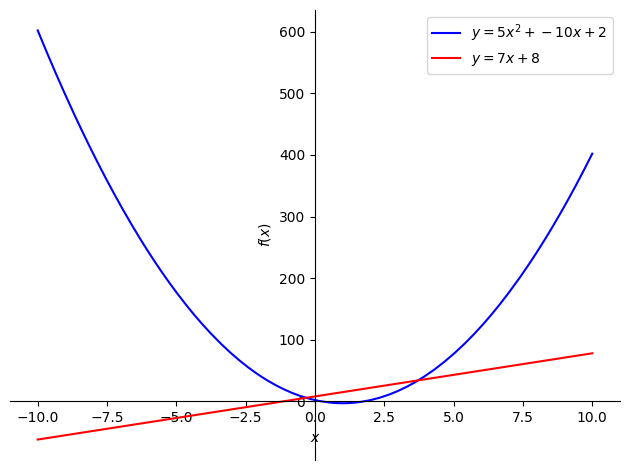

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
import sympy as sp
from sympy.plotting import plot
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output, Math
from IPython.display import display, HTML

# Definir símbolos y parámetros para el primer código
x1 = sp.Symbol('x')

# Función para calcular el discriminante
def calcular_discriminante(a_val, b_val, c_val, d_val, f_val):
    return (b_val - d_val)**2 - 4 * a_val * (c_val - f_val)

# Generar problemas parametrizados para el primer código
def generar_problema(b):
    while True:
        # Generar valores aleatorios para los parámetros
        a_val = np.random.randint(1, 10)
        c_val = np.random.randint(1, 10)
        b_val = np.random.randint(-10, 10)
        d_val = np.random.randint(-10, 10)
        f_val = np.random.randint(-10, 10)

        # Construir las funciones con los valores aleatorios
        funcion1 = a_val * x1**2 + b_val*x1 + c_val
        funcion2 = d_val * x1 + f_val

        # Calcular el discriminante
        discriminante = calcular_discriminante(a_val, b_val, c_val, d_val, f_val)

        # Verificar si el discriminante es mayor que 0
        if discriminante > 0:
            break

    # Graficar las funciones para visualizar el área
    p1 = plot(funcion1, (x1, -10, 10), show=False, line_color='blue', legend=True, label='$y = {}x^2 + {}x + {}$'.format(a_val, b_val, c_val))
    p2 = plot(funcion2, (x1, -10, 10), show=False, line_color='red', legend=True, label='$y = {}x + {}$'.format(d_val, f_val))
    p1.extend(p2)
    p1.show()

    # Calcular las intersecciones de las curvas
    intersecciones = sp.solve(funcion1 - funcion2, x1)

    # Verificar si las curvas se intersecan
    intersecciones_reales = [i.evalf() for i in intersecciones if i.is_real]
    if len(intersecciones_reales) == 0:
        raise ValueError("Las curvas no se intersecan")

    # Calcular el área entre las curvas
    interseccion1, interseccion2 = min(intersecciones_reales), max(intersecciones_reales)
    area = sp.integrate(funcion1 - funcion2, (x1, interseccion1, interseccion2))

    # Tomar el valor absoluto del área
    area_abs = sp.Abs(area)

    # Redondear el área calculada a dos decimales
    area_rounded = round(float(area_abs), 2)

    # Imprimir el enunciado del problema
    display(Math(r"Determine \ el \ área \ de \ la \ región \ limitada \ por \ las \ dos \ curvas:"))
    display(Math(sp.latex(sp.Eq(sp.Symbol('y'), funcion1))))
    display(Math(sp.latex(sp.Eq(sp.Symbol('y'), funcion2))))

    # Imprimir el área calculada
    display(Math(r"El \ área \ de \ la \ región \ limitada \ por \ las \ curvas \ es: \ " + str(area_rounded)))

# Crear botón para generar nuevo ejercicio para el primer código
button_new_problem_1 = widgets.Button(description="Generar Ejercicio")
button_new_problem_1.on_click(generar_problema)

# Crear botón para limpiar la salida para el primer código
button_clear_output_1 = widgets.Button(description="Limpiar")
button_clear_output_1.on_click(lambda _: [clear_output(), display(widgets.HBox([button_new_problem_1, button_clear_output_1]))])

# Mostrar los botones para el primer código
display(widgets.HBox([button_new_problem_1, button_clear_output_1]))